# Lecture02

## SVM

### CIS432 Machine Learning for Business Analytics


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

   X1  X2      Y
0   6  -9  False
1   7   5  False
2  -2   4   True
3   0  -2   True
4  -8   1  False 
 (30, 3)


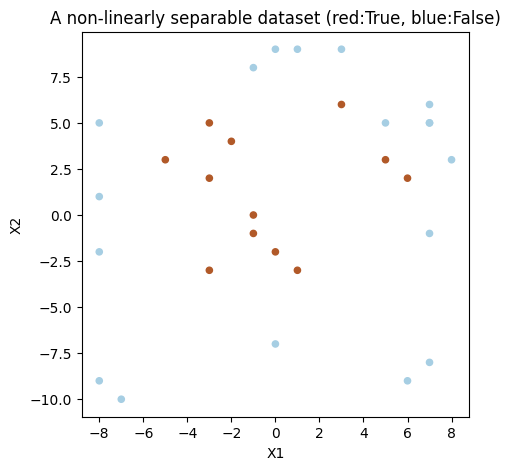

In [ ]:
# Load and visualize a toy dataset
df = pd.read_csv('https://drive.google.com/uc?id=1zeRXawAD0z52NetwncGTfUJe1KOn6zUR&export=download', index_col=0)
print(df.head(), '\n', df.shape)
df.plot.scatter('X1', 'X2', c=df['Y'], cmap=plt.cm.Paired, sharex=False, colorbar=False, figsize=(5,5), title='A non-linearly separable dataset (red:True, blue:False)', legend=True);

In [ ]:
# Compute the performance of linear models on non-linear data
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
X, Y = df[['X1','X2']], df['Y']
clf_svm = svm.SVC(kernel='linear').fit(X, Y)
clf_log = LogisticRegression(random_state=0, C=10**10, solver='liblinear').fit(X,Y)
print(f'SVM accuracy: {accuracy_score(Y, clf_svm.predict(X)):.2f}')
print(f'Log. Reg. accuracy: {accuracy_score(Y, clf_log.predict(X)):.2f}')

SVM accuracy: 0.60
Log. Reg. accuracy: 0.53


In [ ]:
# Computing the expanded featured space
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)
X_expanded = poly.fit_transform(X)
print('Features (in):', poly.feature_names_in_)
print('Features (out):', poly.get_feature_names_out())
print('Expanded data matrix\n', X_expanded[:3,:]) # first 3 rows

Features (in): ['X1' 'X2']
Features (out): ['1' 'X1' 'X2' 'X1^2' 'X1 X2' 'X2^2']
Expanded data matrix
 [[  1.   6.  -9.  36. -54.  81.]
 [  1.   7.   5.  49.  35.  25.]
 [  1.  -2.   4.   4.  -8.  16.]]


In [ ]:
# Train linear models again using X_expanded instead of X
clf_svm = svm.SVC(kernel='linear').fit(X_expanded, Y)
clf_log = LogisticRegression(random_state=0, C=10**10, solver='liblinear').fit(X_expanded,Y)
print('SVM accuracy:', accuracy_score(Y, clf_svm.predict(X_expanded)))
print('Log. Reg. accuracy:', accuracy_score(Y, clf_log.predict(X_expanded)))

SVM accuracy: 1.0
Log. Reg. accuracy: 1.0


The code above is identical to the code from the previous notebook on feature expansion

In [ ]:
# Train SVM with polynomial kernel of degree 2
clf_svm_poly = svm.SVC(kernel='poly', degree=2).fit(X, Y)
print('SVM (polynomial kernel) accuracy:', accuracy_score(Y, clf_svm_poly.predict(X)))

SVM (polynomial kernel) accuracy: 0.9666666666666667


In [ ]:
# Train SVM with polynomial kernel of degree 2, slightly tuned
clf_svm_poly = svm.SVC(kernel='poly', degree=2, C=10**10).fit(X, Y)
print('SVM (polynomial kernel) accuracy:', accuracy_score(Y, clf_svm_poly.predict(X)))

SVM (polynomial kernel) accuracy: 1.0


In [ ]:
# Train SVM with a Radial Basis Function kernel
clf_svm_rbf = svm.SVC(kernel='rbf').fit(X, Y)
print('SVM (RBF kernel) accuracy:', accuracy_score(Y, clf_svm_rbf.predict(X)))

SVM (RBF kernel) accuracy: 0.9


In [ ]:
# Train SVM with a Radial Basis Function kernel, slightly tuned
clf_svm_rbf = svm.SVC(kernel='rbf', C=10**10).fit(X, Y)
print('SVM (RBF kernel) accuracy:', accuracy_score(Y, clf_svm_rbf.predict(X)))

SVM (RBF kernel) accuracy: 1.0


Return to the presentation

# Additional Figures

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.preprocessing import PolynomialFeatures
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

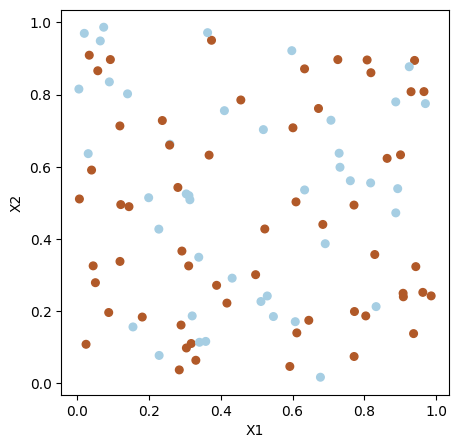

In [ ]:
# Example: a randomly generated dataset
np.random.seed(42)
n = 100
X, Y = np.random.rand(n,2), np.random.rand(n)>0.5
fig, ax = plt.subplots(1,1, figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c=Y, s=30, cmap=plt.cm.Paired, ); plt.xlabel('X1'); plt.ylabel('X2');

In [ ]:
clf_svm_rbf = svm.SVC(kernel='rbf', C=1000, gamma=1000).fit(X, Y)
print('Training accuracy of SVM with RBF kernel:', accuracy_score(Y, clf_svm_rbf.predict(X)))

Training accuracy of SVM with RBF kernel: 1.0


In [ ]:
# KNN model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
# Train the model
knn.fit(X, Y)
print('Training accuracy of KNN:', accuracy_score(Y, clf_svm_rbf.predict(X)))

Training accuracy of KNN: 1.0


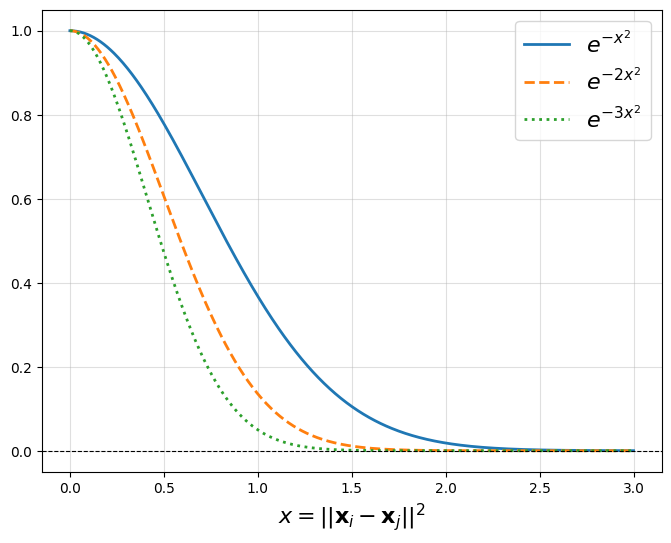

In [ ]:
# Define the functions
def f(x):
    return np.exp(-x**2)

def g(x):
    return np.exp(-2 * x**2)

def h(x):
    return np.exp(-3 * x**2)

# Generate x values for the positive part of the x-axis
x_positive = np.linspace(0, 3, 500)  # Range from 0 to 3 with 500 points

# Compute y values for all functions
y_positive = f(x_positive)
y_positive_g = g(x_positive)
y_positive_h = h(x_positive)

# Plot all three functions
plt.figure(figsize=(8, 6))
plt.plot(x_positive, y_positive, label=r"$e^{-x^2}$", linewidth=2)
plt.plot(x_positive, y_positive_g, label=r"$e^{-2x^2}$", linewidth=2, linestyle='--')
plt.plot(x_positive, y_positive_h, label=r"$e^{-3x^2}$", linewidth=2, linestyle=':')
#plt.title("Plot of $e^{-x^2}$, $e^{-2x^2}$, and $e^{-3x^2}$")
plt.xlabel("$x = ||\mathbf{x}_i - \mathbf{x}_j||^2$", fontsize=16)
#plt.ylabel("y")
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.grid(alpha=0.4)
plt.legend(fontsize=16)  # Increase legend font size
plt.show()
